In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in df_paiso, containing all 272526 CCS reads from all paiso seq results.
df_paiso = pd.read_csv("../raw/PAIsoSeq_Wu_2022.csv",index_col=0)
df_paiso

df_paiso['sampleID'] = df_paiso['Genotype']+'_' + df_paiso['oocyte_ID'].astype(str)
df_paiso
# only need the ctr5 6 7 8 and cKO 5 6 7 8 oocytes
df_paiso = df_paiso[df_paiso['oocyte_ID'].isin([5,6,7,8])]
# df_paiso

,CCS_ID,Genotype,mouse_ID,oocyte_ID,gene_ID,gene_name,fq_seq,pA_seq,polyA_len,tail_seq,tail_len,pA_U_number,tail_U_number,pA_U_percent,tail_U_percent,compare_pA_tail,type,sampleID
1,m54313U_201124_160408/93848445/ccs,ctr,BX443,5,ENSMUSG00000021466,Ptch1,GAGTTGTAAACAAGTTGCCACCTTAAATCTTCGGGGAAGGCTACTG...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,99,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,80,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,ctr_5
2,m54313U_201124_160408/100467697/ccs,ctr,BX443,5,ENSMUSG00000029314,Gpat3,ATCGCTGTACAAGGAGGGCTGACGGAACTTCCCTGGGATGGAGGGC...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,89,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,87,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,ctr_5
4,m54313U_201124_160408/158795879/ccs,ctr,BX443,5,ENSMUSG00000027177,Hipk3,AACTTTACTAAAGTCGGGACACTAAGAAGTCAGGCGTTAACCACAT...,AATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,62,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,56,1,0.0,0.016129,0.000000,longer_pA,polyA_RNA,ctr_5
5,m54313U_201124_160408/51579517/ccs,ctr,BX443,5,ENSMUSG00000029521,Chek2,GGTATCCTAAGGAATTAAGAGACGAATACATCATGTCAAAAACTCT...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,89,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,88,1,1.0,0.011236,0.011364,longer_pA,polyA_RNA,ctr_5
6,m54313U_201114_190654/809/ccs,cKO,BX433,7,ENSMUSG00000034203,Chchd4,AAGAGCCCTGGTTTGGGGCCCATGTTCACTCAGTTGTGATATTGAG...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,120,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,119,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,cKO_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272412,m54313U_200903_184952/57805445/ccs,ctr,BX443,7,ENSMUSG00000001270,Ckb,GGGACTGCGGGCAGGTGTGCACATCAAGCTGCCCCACCTGGGGAAG...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,99,CTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,101,0,1.0,0.000000,0.009901,longer_tail,U_polyA_RNA,ctr_7
272415,m54313U_200903_184952/59180469/ccs,ctr,BX443,7,ENSMUSG00000054091,1810037I17Rik,GTCTCAGTTGCGCGGAAGTGAAACGACGCGGAGATGGAGGTGAGCC...,AAAGAATAAAAATTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,52,AGAAATCTGATTAAAGAATAAAAATTAAAAAAAAAAAAAAAAAAAA...,64,3,7.0,0.057692,0.109375,longer_tail,U_polyA_RNA,ctr_7
272483,m54313U_200903_184952/131465931/ccs,ctr,BX443,7,ENSMUSG00000030647,Ndufc2,GGTCACGGCGTTTGGAGTCGTTGTTTTTCCTATAGTTGGAGTCGAG...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,48,GAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,49,0,0.0,0.000000,0.000000,longer_tail,U_polyA_RNA,ctr_7
272508,m54313U_200903_184952/163186301/ccs,ctr,BX443,7,ENSMUSG00000040935,Padi6,GGTGCCATTTGCATTCAAGTGGTGGAAGATGACCCCATAAACCCCA...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,217,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,218,0,0.0,0.000000,0.000000,longer_tail,U_polyA_RNA,ctr_7


In [98]:
ntop = 100
# to study the PC1 ntop genes
# get the PC1 genes:
df_PC = pd.read_csv("../../results/PC1_from_rM_seq.csv")
df_PC
list_top = df_PC.loc[:ntop,'Unnamed: 0'].tolist()
list_top

# visualize the ntop genes:
df_paiso_ntop = df_paiso[df_paiso['gene_ID'].isin(list_top)]
df_paiso_ntop

,CCS_ID,Genotype,mouse_ID,oocyte_ID,gene_ID,gene_name,fq_seq,pA_seq,polyA_len,tail_seq,tail_len,pA_U_number,tail_U_number,pA_U_percent,tail_U_percent,compare_pA_tail,type,sampleID
1,m54313U_201124_160408/93848445/ccs,ctr,BX443,5,ENSMUSG00000021466,Ptch1,GAGTTGTAAACAAGTTGCCACCTTAAATCTTCGGGGAAGGCTACTG...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,99,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,80,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,ctr_5
28,m54313U_201114_190654/78578706/ccs,cKO,BX433,7,ENSMUSG00000007872,Id3,ACTGTTTGCTGCTTTAGGTGTCTCTTTTCCTCCCTCTCTATCTCTA...,AACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,186,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,182,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,cKO_7
34,m54313U_201114_190654/83625279/ccs,cKO,BX433,7,ENSMUSG00000007872,Id3,ACTGTTTGCTGCTTTAGGTGTCTCTTTTCCTCCCTCTCTATCTCTA...,AACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,172,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,168,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,cKO_7
41,m54313U_201114_190654/88146865/ccs,cKO,BX433,7,ENSMUSG00000007872,Id3,ACTGTTTGCTGCTTTAGGTGTCTCTTTTCCTCCCTCTCTATCTCTA...,AACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,177,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,173,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,cKO_7
42,m54313U_201114_190654/90113638/ccs,cKO,BX433,7,ENSMUSG00000007872,Id3,ACTGTTTGCTGCTTTAGGTGTCTCTTTTCCTCCCTCTCTATCTCTA...,AACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,182,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,178,0,0.0,0.000000,0.000000,longer_pA,polyA_RNA,cKO_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208400,m54313U_201113_175135/31917117/ccs,cKO,BX435,6,ENSMUSG00000031765,Mt1,AAGAAGCACGGCGCGGTTTTGCTAAAGTGATGTCTGAGTTTGGCGA...,AAAAAAATTTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,49,TTTTTTTTTTTTTATTTTTAAAAAAATTTAAAAAAAAAAAAAAAAA...,68,3,21.0,0.061224,0.308824,longer_tail,U_polyA_RNA,cKO_6
208432,m54313U_201113_175135/32573516/ccs,cKO,BX435,6,ENSMUSG00000031283,Chrdl1,AGGAAATGAAAGGCATAGTAGCTTTTCTGATCATTTCTTCGGGATG...,AAAAAAAAAAAAAAAA,16,TTTTTTTTTTATTTTAAAAAAAAAAAAAAAA,31,0,14.0,0.000000,0.451613,longer_tail,U_polyA_RNA,cKO_6
209620,m54313U_201113_175135/62653465/ccs,cKO,BX435,6,ENSMUSG00000031765,Mt1,TGAACTGAGCCGGGACTCGTGGTGTTGGCCACTGCTGTAATGCTGC...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,82,TTTTCTATTTTTTTTATTTTTTTTTATAAAAAAAAAAAAAAAAAAA...,109,0,23.0,0.000000,0.211009,longer_tail,U_polyA_RNA,cKO_6
249685,m54313U_201114_190654/72745611/ccs,cKO,BX433,6,ENSMUSG00000031765,Mt1,ACCACGTGTAAATAGTATCGGACCAACCCAGCGTCTTCCTATACAG...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAA...,80,AATTATTTTTTTTTTTTTTTTTTTTTAAAAAAAAAAAAAAAAAAAA...,106,1,24.0,0.012500,0.226415,longer_tail,U_polyA_RNA,cKO_6


In [104]:
len(df_paiso_ntop.groupby(['gene_ID']).count())

57

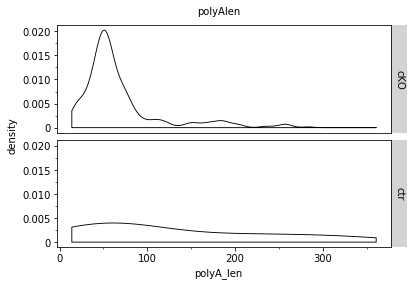

<ggplot: (8784183622133)>

In [101]:
# plot the length of the internal extra region:
title = 'polyAlen'
plot = (
    p9.ggplot(df_paiso_ntop, 
                  p9.aes(x='polyA_len'))
    + p9.geom_density()
    + p9.theme(void)
    + p9.labs(title = title)
    + p9.facet_grid('Genotype~')
)
plot
# plot.save("../results/paiso_cKO_" + title + ".pdf", height=3, width=2)
